In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=[15,5]
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")

In [64]:
df_sales = pd.read_csv("bigmartsales-cleaned.csv")
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.1,OUT010,1998,NaN,NaN,Grocery Store,732.3800,13.6
4,NCD19,8.93,Low Fat,0.000000,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1


# Session 1

## 1. Data Summary

In [67]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7774 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       6473 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Profit                     8523 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage:

In [68]:
# Convert the Outlet_Establishment_Year into categorical
df_sales['Outlet_establishment_Year'] = df_sales['Outlet_Establishment_Year'].astype('object')

In [69]:
df_sales.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Profit
count,7774.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,11.676740,0.066132,140.998838,1997.831867,2181.288914,13.414514
std,5.776851,0.051598,62.258099,8.371760,1706.499616,1.701840
min,0.000000,0.000000,31.300000,1985.000000,33.290000,0.100000
25%,7.720000,0.026989,93.800000,1987.000000,834.247400,13.150000
50%,11.800000,0.053931,142.700000,1999.000000,1794.331000,13.900000
75%,16.500000,0.094585,185.650000,2004.000000,3101.296400,14.300000
max,21.350000,0.328391,266.900000,2009.000000,13086.964800,24.000000


In [70]:
df_sales.describe(include=object)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_establishment_Year
count,8523,8523,8523,8523,6113,6473,8523,8523
unique,1559,2,16,10,3,8,4,9
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 2,Supermarket Type1,1985
freq,10,5517,1232,935,2793,2793,5577,1463


## 2. Missing Values

In [72]:
df_sales.isnull()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit,Outlet_establishment_Year
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,False,True,True,False,False,False,False
8520,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [73]:
df_sales.isnull().sum()

Item_Identifier                 0
Item_Weight                   749
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type         2050
Outlet_Type                     0
Item_Outlet_Sales               0
Profit                          0
Outlet_establishment_Year       0
dtype: int64

In [74]:
df_sales.isnull().sum().sort_values(ascending= False)

Outlet_Size                  2410
Outlet_Location_Type         2050
Item_Weight                   749
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Type                     0
Item_Outlet_Sales               0
Profit                          0
Outlet_establishment_Year       0
dtype: int64

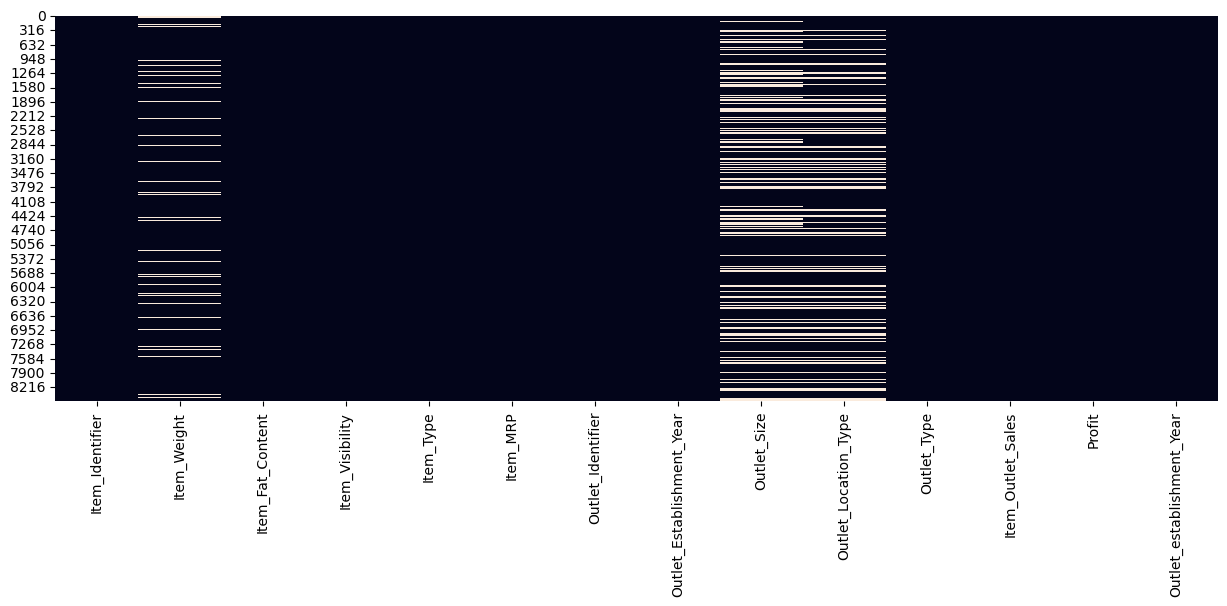

In [75]:
plt.rcParams["figure.figsize"] = [15,5]
sb.heatmap(df_sales.isnull(), cbar=False)
plt.show()

In [76]:
total = df_sales.isnull().sum().sort_values(ascending= False)
percent = ((df_sales.isnull().sum()/df_sales.shape[0])*100)
precent = percent.sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [77]:
missing_data

,Total,Percent
Outlet_Size,2410,28.276428
Outlet_Location_Type,2050,24.052564
Item_Weight,749,8.787985
Item_Identifier,0,0.000000
Item_Fat_Content,0,0.000000
Item_Visibility,0,0.000000
Item_Type,0,0.000000
Item_MRP,0,0.000000
Outlet_Identifier,0,0.000000
Outlet_Establishment_Year,0,0.000000


In [78]:
# Here Item_Visibility column is also a missing values column

#### 1. Outlet Size

In [80]:
df_sales.Outlet_Size.value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [81]:
df_sales.Outlet_Size.replace(np.NaN, "Medium", inplace = True)

In [82]:
df_sales.Outlet_Size.isnull().sum()

0

#### 2. Outlet_Location_Type

In [84]:
df_sales.Outlet_Location_Type.value_counts()

Outlet_Location_Type
Tier 2    2793
Tier1     2388
Tier 3     932
?          120
  --       109
  -         67
na          48
NAN         16
Name: count, dtype: int64

In [85]:
# some times values are wrtten like ? na etc, these are all non-standard missing values
# convert them into a standard values

In [86]:
df_sales.Outlet_Location_Type.replace(to_replace="?", value=np.NaN, inplace = True)
df_sales.Outlet_Location_Type.replace(to_replace=" --", value=np.NaN, inplace = True)
df_sales.Outlet_Location_Type.replace(to_replace=" -", value=np.NaN, inplace = True)
df_sales.Outlet_Location_Type.replace(to_replace="na", value=np.NaN, inplace = True)
df_sales.Outlet_Location_Type.replace(to_replace="NaN", value=np.NaN, inplace = True)

In [87]:
df_sales.Outlet_Location_Type.value_counts()

Outlet_Location_Type
Tier 2    2793
Tier1     2388
Tier 3     932
  --       109
  -         67
NAN         16
Name: count, dtype: int64

In [88]:
df_sales.Outlet_Location_Type.replace(to_replace="  --", value=np.NaN, inplace = True)
df_sales.Outlet_Location_Type.replace(to_replace="  -", value=np.NaN, inplace = True)

In [89]:
df_sales.Outlet_Location_Type.value_counts()

Outlet_Location_Type
Tier 2    2793
Tier1     2388
Tier 3     932
NAN         16
Name: count, dtype: int64

In [90]:
df_sales.Outlet_Location_Type.isnull().sum()

2394

In [91]:
df_sales.Outlet_Location_Type.replace(to_replace="NAN", value=np.NaN, inplace = True)

In [92]:
df_sales.Outlet_Location_Type.isnull().sum()

2410

In [93]:
df_sales.Outlet_Location_Type.value_counts()

Outlet_Location_Type
Tier 2    2793
Tier1     2388
Tier 3     932
Name: count, dtype: int64

In [94]:
df_impute = df_sales[['Item_Outlet_Sales', 'Outlet_Location_Type']].dropna()
df_impute = df_impute.groupby(df_impute['Outlet_Location_Type']).mean()
df_impute

,Item_Outlet_Sales
Outlet_Location_Type,
Tier 2,2681.603542
Tier 3,2298.995256
Tier1,1912.149161


In [95]:
# Since we have different mean to each location type, we have to use different apprach
# Baed on Outlet sales identify the 3 range and impute the values based on the sale range values

In [96]:
index = np.where(df_sales.Outlet_Location_Type.isnull())[0]
for ind in index :
    if df_sales.loc[ind, "Item_Outlet_Sales"] <= 2100 :
        df_sales.loc[ind, "Outlet_Location_Type"] = "Tier1"
    elif df_sales.loc[ind, "Item_Outlet_Sales"] >= 2500 :
        df_sales.loc[ind, "Outlet_Location_Type"] = "Tier 2"
    else:
        df_sales.loc[ind, "Outlet_Location_Type"] = "Tier 3"
    

In [97]:
df_sales.Outlet_Location_Type.value_counts()

Outlet_Location_Type
Tier1     3947
Tier 2    3483
Tier 3    1093
Name: count, dtype: int64

#### 3. Item_Weight

In [99]:
df_sales.Item_Weight.value_counts()

Item_Weight
0.000     714
12.150     86
17.600     82
13.650     77
11.800     76
         ... 
7.275       2
7.685       1
9.420       1
6.520       1
5.400       1
Name: count, Length: 416, dtype: int64

In [100]:
df_sales.Item_Weight.describe()

count    7774.000000
mean       11.676740
std         5.776851
min         0.000000
25%         7.720000
50%        11.800000
75%        16.500000
max        21.350000
Name: Item_Weight, dtype: float64

In [101]:
# Convert zero with standar missing value
# So, replace with median value

In [102]:
me = df_sales["Item_Weight"].median()

In [103]:
me

11.8

In [104]:
df_sales['Item_Weight'].fillna(me, inplace = True)

In [105]:
df_sales.Item_Weight.value_counts()

Item_Weight
11.800    825
0.000     714
12.150     86
17.600     82
13.650     77
         ... 
7.275       2
7.685       1
9.420       1
6.520       1
5.400       1
Name: count, Length: 416, dtype: int64

In [106]:
df_sales.Item_Weight.replace(0,me, inplace = True)

#### 4. Item_Visibility

In [108]:
mu = df_sales["Item_Visibility"].mean()

In [109]:
df_sales.Item_Visibility.replace(0,mu, inplace = True)

In [110]:
df_sales['Item_Visibility'].fillna(mu, inplace = True)

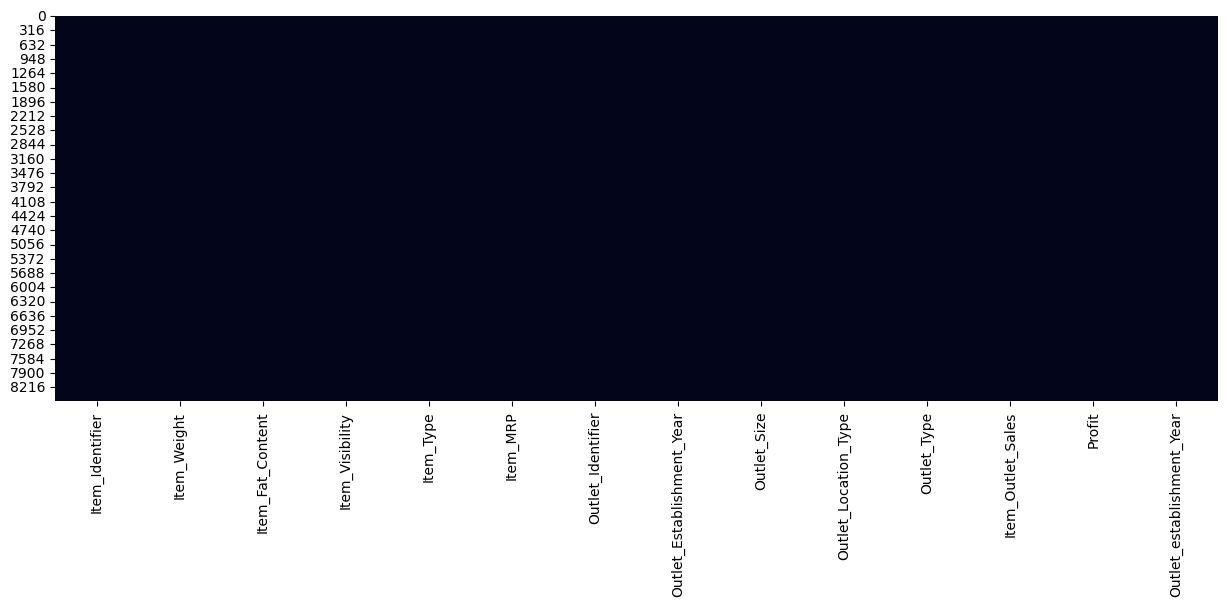

In [111]:
plt.rcParams["figure.figsize"] = [15,5]
sb.heatmap(df_sales.isnull(), cbar=False)
plt.show()

# Session 2

In [113]:
df_sales.describe(include=object)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_establishment_Year
count,8523,8523,8523,8523,8523,8523,8523,8523
unique,1559,2,16,10,3,3,4,9
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier1,Supermarket Type1,1985
freq,10,5517,1232,935,5203,3947,5577,1463


In [114]:
df_sales.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [115]:
# Convert Item_Type to encoding

In [116]:
test = pd.get_dummies(df_sales, columns=['Item_Type'], dtype = int)

In [117]:
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,FDA15,9.300,Low Fat,0.016047,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,...,0,0,0,0,0,0,0,0,0,0
1,DRC01,5.920,Regular,0.019278,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,...,0,0,0,0,0,0,0,0,1,0
2,FDN15,17.500,Low Fat,0.016760,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,...,0,0,0,0,1,0,0,0,0,0
3,FDX07,19.200,Regular,0.066132,182.1,OUT010,1998,Medium,Tier1,Grocery Store,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.930,Low Fat,0.066132,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,214.5,OUT013,1987,High,Tier 3,Supermarket Type1,...,0,0,0,0,0,0,0,1,0,0
8519,FDS36,8.380,Regular,0.046982,108.2,OUT045,2002,Medium,Tier1,Supermarket Type1,...,0,0,0,0,0,0,0,0,0,0
8520,NCJ29,10.600,Low Fat,0.035186,85.1,OUT035,2004,Small,Tier1,Supermarket Type1,...,0,0,1,0,0,0,0,0,0,0
8521,FDN46,7.210,Regular,0.145221,103.1,OUT018,2009,Medium,Tier 2,Supermarket Type2,...,0,0,0,0,0,0,0,1,0,0


In [118]:
test = pd.get_dummies(df_sales, columns=['Item_Type'], drop_first = True, dtype = int)

In [119]:
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,FDA15,9.300,Low Fat,0.016047,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,...,0,0,0,0,0,0,0,0,0,0
1,DRC01,5.920,Regular,0.019278,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,...,0,0,0,0,0,0,0,0,1,0
2,FDN15,17.500,Low Fat,0.016760,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,...,0,0,0,0,1,0,0,0,0,0
3,FDX07,19.200,Regular,0.066132,182.1,OUT010,1998,Medium,Tier1,Grocery Store,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.930,Low Fat,0.066132,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,214.5,OUT013,1987,High,Tier 3,Supermarket Type1,...,0,0,0,0,0,0,0,1,0,0
8519,FDS36,8.380,Regular,0.046982,108.2,OUT045,2002,Medium,Tier1,Supermarket Type1,...,0,0,0,0,0,0,0,0,0,0
8520,NCJ29,10.600,Low Fat,0.035186,85.1,OUT035,2004,Small,Tier1,Supermarket Type1,...,0,0,1,0,0,0,0,0,0,0
8521,FDN46,7.210,Regular,0.145221,103.1,OUT018,2009,Medium,Tier 2,Supermarket Type2,...,0,0,0,0,0,0,0,1,0,0


In [120]:
# Using sklearn for One-hot encoding

In [121]:
from sklearn.preprocessing import OneHotEncoder
encode = OneHotEncoder()
df_encode = pd.DataFrame(encode.fit_transform(
    df_sales[['Outlet_Type']]).toarray(),
    columns = ['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3']
)
df_encode = pd.concat([df_sales,df_encode], axis = 1)
df_encode

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit,Outlet_establishment_Year,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5,1999,0.0,1.0,0.0,0.0
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3,2009,0.0,0.0,1.0,0.0
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5,1999,0.0,1.0,0.0,0.0
3,FDX07,19.200,Regular,0.066132,Fruits and Vegetables,182.1,OUT010,1998,Medium,Tier1,Grocery Store,732.3800,13.6,1998,1.0,0.0,0.0,0.0
4,NCD19,8.930,Low Fat,0.066132,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1,1987,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,14.1,1987,0.0,1.0,0.0,0.0
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.2,OUT045,2002,Medium,Tier1,Supermarket Type1,549.2850,14.2,2002,0.0,1.0,0.0,0.0
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1,OUT035,2004,Small,Tier1,Supermarket Type1,1193.1136,9.5,2004,0.0,1.0,0.0,0.0
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1,OUT018,2009,Medium,Tier 2,Supermarket Type2,1845.5976,14.2,2009,0.0,0.0,1.0,0.0


In [122]:
df_sales.Outlet_Size.value_counts()

Outlet_Size
Medium    5203
Small     2388
High       932
Name: count, dtype: int64

In [123]:
"""
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_sales['Label_Encoded_Outlet_Size'] = labelencoder.fit_transform(
    df_sales['Label_Encoded_Outlet_Size']]).toarray(),
    columns = ['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3']
)
df_encode = pd.concat([df_sales,df_encode], axis = 1)
df_encode
"""

"\nfrom sklearn.preprocessing import LabelEncoder\nlabelencoder = LabelEncoder()\ndf_sales['Label_Encoded_Outlet_Size'] = labelencoder.fit_transform(\n    df_sales['Label_Encoded_Outlet_Size']]).toarray(),\n    columns = ['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3']\n)\ndf_encode = pd.concat([df_sales,df_encode], axis = 1)\ndf_encode\n"

In [124]:
from sklearn.preprocessing import OrdinalEncoder

In [125]:
orderencoding = OrdinalEncoder(categories = [["Small", "Medium", "High"]]) # here these vlaues shold be in order

In [126]:
df_sales['Ordinal_Outlet_Size'] = orderencoding.fit_transform(df_sales['Outlet_Size'].values.reshape(-1,1))

In [127]:
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit,Outlet_establishment_Year,Ordinal_Outlet_Size
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5,1999,1.0
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3,2009,1.0
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5,1999,1.0
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.1,OUT010,1998,Medium,Tier1,Grocery Store,732.3800,13.6,1998,1.0
4,NCD19,8.93,Low Fat,0.066132,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1,1987,2.0


In [128]:
encoding = df_sales.groupby('Item_Type').size()
encoding = encoding / len(df_sales)

In [129]:
df_sales['Freq_Encoded_Item_Type'] = df_sales.Item_Type.map(encoding)*100
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit,Outlet_establishment_Year,Ordinal_Outlet_Size,Freq_Encoded_Item_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5,1999,1.0,8.001877
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3,2009,1.0,5.221166
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5,1999,1.0,4.986507
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.1,OUT010,1998,Medium,Tier1,Grocery Store,732.3800,13.6,1998,1.0,14.455004
4,NCD19,8.93,Low Fat,0.066132,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1,1987,2.0,10.676992


In [130]:
# Target Encoding

df_smoker = pd.DataFrame({'Smoker':['yes', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'yes'], 'Target' : [1,0,1,0,0,0,1,0,0,1]})

In [131]:
df_smoker

,Smoker,Target
0,yes,1
1,yes,0
2,no,1
3,no,0
4,yes,0
5,no,0
6,yes,1
7,yes,0
8,no,0
9,yes,1


In [132]:
df_smoker['make_target_encode'] = df_smoker.groupby('Smoker')['Target'].transform('mean')

In [133]:
df_smoker.head()

,Smoker,Target,make_target_encode
0,yes,1,0.50
1,yes,0,0.50
2,no,1,0.25
3,no,0,0.25
4,yes,0,0.50


In [134]:
# Scaling

In [135]:
# Standard scaling

<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

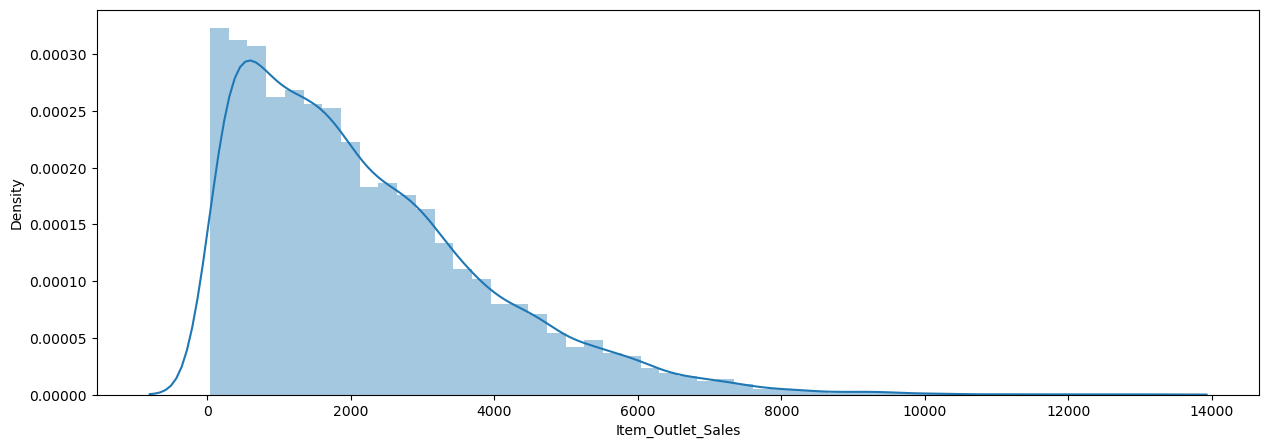

In [136]:
sb.distplot(df_sales.Item_Outlet_Sales)

In [137]:
print("The min value of the sales : ", df_sales['Item_Outlet_Sales'].min())

The min value of the sales :  33.29


In [138]:
print("The min value of the sales : ", df_sales['Item_Outlet_Sales'].max())

The min value of the sales :  13086.9648


In [139]:
print(df_sales['Item_Outlet_Sales'].skew())

1.1775306028542796


In [140]:
from sklearn.preprocessing import StandardScaler

In [141]:
standard_scale = StandardScaler()

In [142]:
df_sales['Scaled_Item_Outlet_Sales'] = standard_scale.fit_transform(df_sales[['Item_Outlet_Sales']])

In [143]:
print("Min value of the sales" , df_sales['Scaled_Item_Outlet_Sales'].min())

Min value of the sales -1.2587901671720854


In [144]:
print("Max value of the sales" , df_sales['Scaled_Item_Outlet_Sales'].max())

Max value of the sales 6.391044932769205


In [145]:
df_sales['Scaled_Item_Outlet_Sales'].skew()

1.1775306028542794

<Axes: xlabel='Scaled_Item_Outlet_Sales', ylabel='Density'>

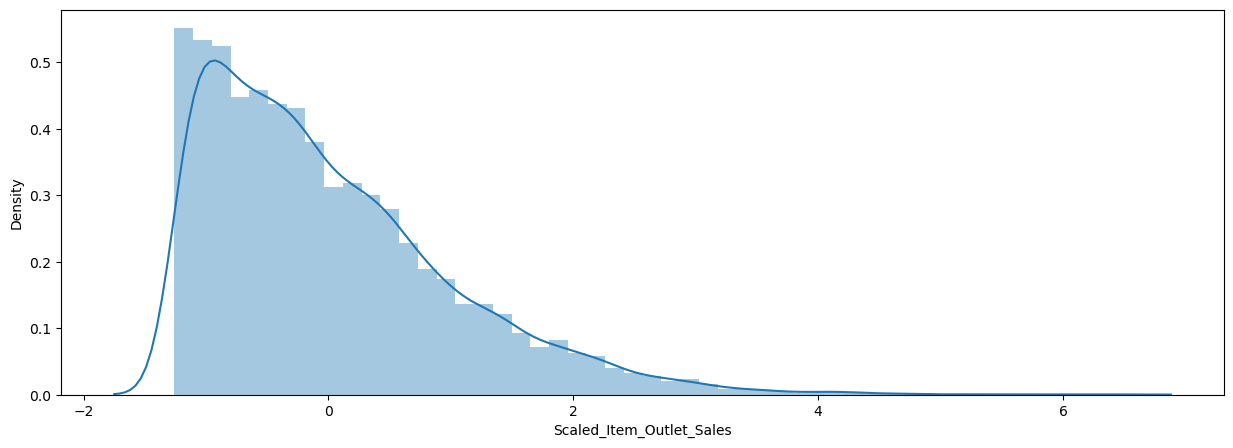

In [146]:
sb.distplot(df_sales['Scaled_Item_Outlet_Sales'])

In [147]:
# Min Max scaling

In [148]:
from sklearn.preprocessing import MinMaxScaler

In [149]:
min_max = MinMaxScaler()

In [150]:
df_sales['Scaled_Item_Outlet_Sales'] = min_max.fit_transform(df_sales[['Item_Outlet_Sales']])

In [151]:
df_sales['Scaled_Item_Outlet_Sales'].min(),df_sales['Scaled_Item_Outlet_Sales'].max()

(0.0, 1.0)

In [152]:
# Outliers 

In [154]:
df_num = df_sales.select_dtypes(include = np.number)
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Visibility            8523 non-null   float64
 2   Item_MRP                   8523 non-null   float64
 3   Outlet_Establishment_Year  8523 non-null   int64  
 4   Item_Outlet_Sales          8523 non-null   float64
 5   Profit                     8523 non-null   float64
 6   Ordinal_Outlet_Size        8523 non-null   float64
 7   Freq_Encoded_Item_Type     8523 non-null   float64
 8   Scaled_Item_Outlet_Sales   8523 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 599.4 KB


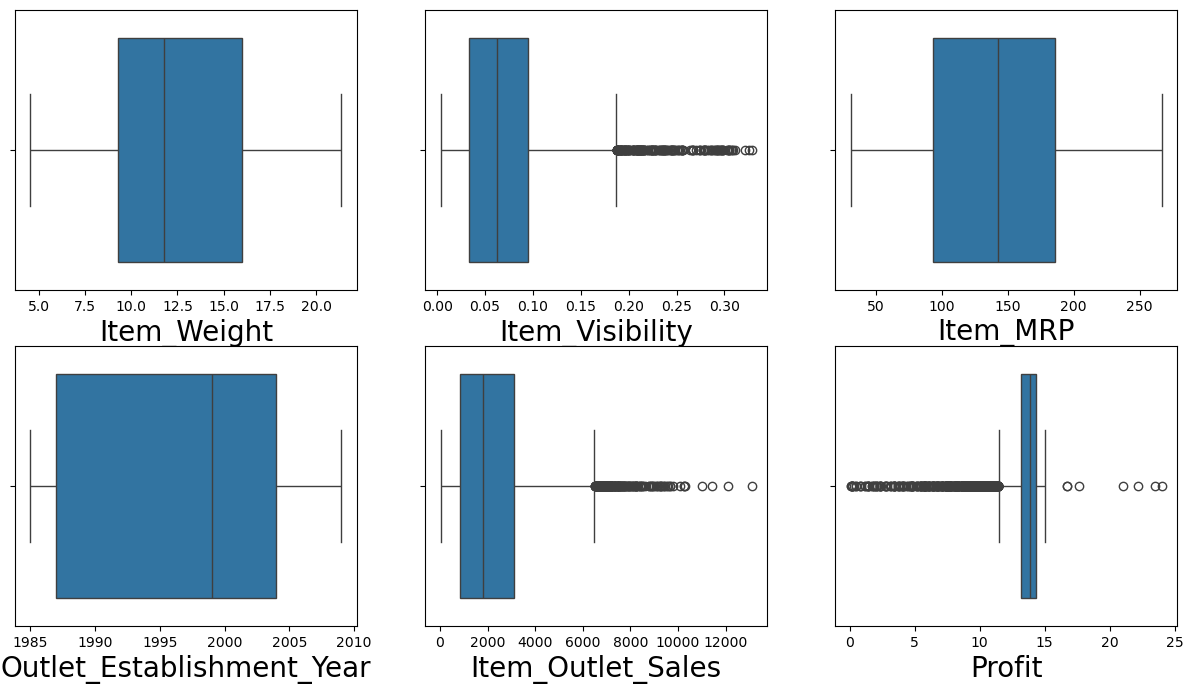

In [166]:
fig, ax = plt.subplots(2,3, figsize=(15,8))
for  variable , subplot in zip(df_num.columns, ax.flatten()):
    z= sb.boxplot(x=df_num[variable], orient = 'h', whis=1.5, ax=subplot)
    z.set_xlabel(variable, fontsize = 20)

In [172]:
q1 = df_num.quantile(0.25)
q3 = df_num.quantile(0.75)
iqr = q3-q1
lb = q1-1.5*iqr
ub = q3+1.5*iqr

In [176]:
(df_num < lb) | (df_num > ub).any(axis=1) # This will give me outlier

,0,1,2,3,4,5,6,7,8,9,...,8522,Freq_Encoded_Item_Type,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Ordinal_Outlet_Size,Outlet_Establishment_Year,Profit,Scaled_Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8520,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
8521,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df_num1 = df_num[~((df_num < lb) | (df_num > ub)).any(axis=1))]

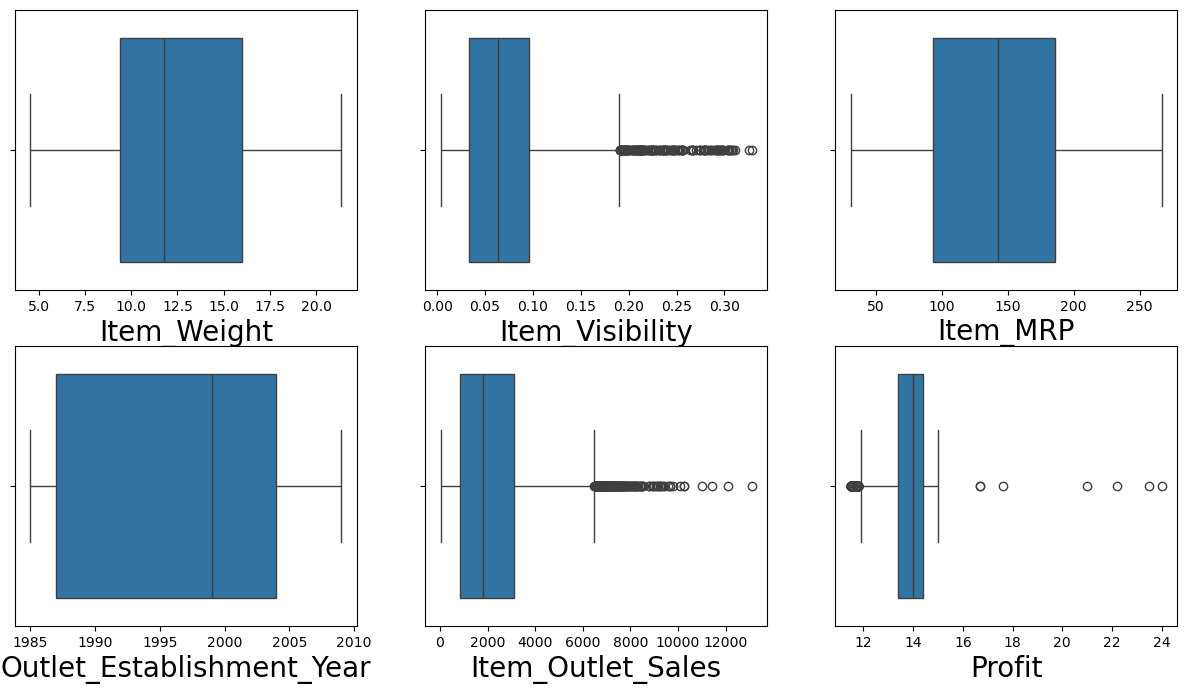

In [187]:
fig, ax = plt.subplots(2,3, figsize=(15,8))
for  variable , subplot in zip(df_num1.columns, ax.flatten()):
    z= sb.boxplot(x=df_num1[variable], orient = 'h', whis=1.5, ax=subplot)
    z.set_xlabel(variable, fontsize = 20)

In [ ]:
# Z-Score appraoch

In [189]:
import scipy
from scipy import stats

In [191]:
df_drop2 = df_sales[['Item_Visibility','Item_Outlet_Sales','Profit']]
df_drop2.skew()

Item_Visibility      1.286877
Item_Outlet_Sales    1.177531
Profit              -3.379808
dtype: float64

In [199]:
zscore_df = scipy.stats.zscore(df_drop2)
df_zscore = df_drop2[~(((zscore_df>3) | (zscore_df<-3)).any(axis=1))]

In [201]:
df_zscore

,Item_Visibility,Item_Outlet_Sales,Profit
0,0.016047,3735.1380,11.5
1,0.019278,443.4228,14.3
2,0.016760,2097.2700,14.5
3,0.066132,732.3800,13.6
4,0.066132,994.7052,14.1
...,...,...,...
8518,0.056783,2778.3834,14.1
8519,0.046982,549.2850,14.2
8520,0.035186,1193.1136,9.5
8521,0.145221,1845.5976,14.2


In [203]:
df_zscore.skew()

Item_Visibility      0.861365
Item_Outlet_Sales    0.877450
Profit              -1.821963
dtype: float64

In [ ]:
# CAP

In [ ]:
df_num = df_sales[['Item_Visibility','Item_Outlet_Sales','Profit']]

In [215]:
for i in df_num.columns:
    q1 = df_num[i].quantile(0.25)
    q3 = df_num[i].quantile(0.75)
    iqr = q3-q1
    lb = q1-1.5*iqr
    ub = q3+1.5*iqr
    quantile_01 = df_num[i].quantile(0.10)
    quantile_90 = df_num[i].quantile(0.90)
    df_num[i] = np.where(df_num[i] < lb, quantile_01, df_num[i])
    df_num[i] = np.where(df_num[i] > lb, quantile_90, df_num[i])
